In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [2]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 벡터로 변환
cnn.add(Dense(128, activation='relu')) # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) # 출력층

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 200s 423ms/step - loss: 0.2490 - accuracy: 0.9253 - val_loss: 0.0556 - val_accuracy: 0.9821
Epoch 2/30
469/469 [==============================] - 193s 411ms/step - loss: 0.0847 - accuracy: 0.9753 - val_loss: 0.0390 - val_accuracy: 0.9858
Epoch 3/30
469/469 [==============================] - 194s 412ms/step - loss: 0.0633 - accuracy: 0.9811 - val_loss: 0.0342 - val_accuracy: 0.9887
Epoch 4/30
469/469 [==============================] - 195s 416ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 5/30
469/469 [==============================] - 189s 404ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 6/30
469/469 [==============================] - 196s 419ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 7/30
469/469 [==============================] - 187s 399ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0350 -

In [3]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.0351 - accuracy: 0.9927


[0.035074904561042786, 0.9926999807357788]

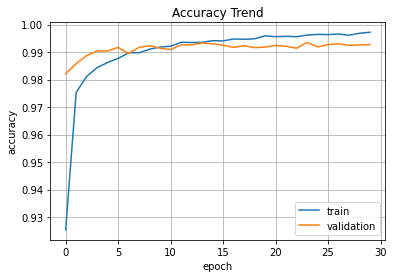

In [4]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

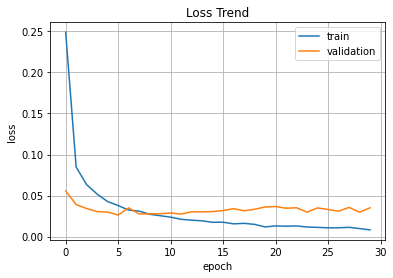

In [5]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()